<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Получены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определять рыночную стоимость объектов недвижимости. Задача — установить параметры для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Импортируем библиотеки:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Изучение данных из файла

In [3]:
#/Users/romankuzmin/Downloads/real_estate_data.csv   offline
#https://code.s3.yandex.net/datasets/real_estate_data.csv online
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv ', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Проверим типы данных столбцов датафрейма

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрим описательные статистики в ранспонированном виде:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Нехватает информации по характеристикам объекта:

- высоте потолков ceiling_height
- статусу недвижимости is_apartment
- жилой площади living_area
- площади кухни kitchen_area
- наличию балкона balcony
- распложению locality_name

данным по удаленности от значимых объектов и их количестве в радиусе 3000 м:
- airports_nearest      
- cityCenters_nearest   
- parks_around3000      
- parks_nearest        
- ponds_around3000     
- ponds_nearest         

длительности размещения объявления:
- days_exposition 

### Вывод

После первичного обзора датасета видим, что в некоторых столбцах данные не полные, необходимо проанализировать каждый из столбцов, удалить или заполнить пропуски при необходимости. 



## Предобработка данных

### Пропуски

Посчитаем количество пропущенных значений

In [6]:
df.isna().sum().sort_values(ascending=True)

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Добавим информацию о проценте прпоусков по столбцам для наглядности

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 22 columns and 23699 Rows.
There are 14 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
is_apartment,2725,20924,88.3,23649,99.8,object
parks_nearest,0,15620,65.9,15620,65.9,float64
ponds_nearest,0,14589,61.6,14589,61.6,float64
balcony,3758,11519,48.6,15277,64.5,float64
ceiling_height,0,9195,38.8,9195,38.8,float64
airports_nearest,1,5542,23.4,5543,23.4,float64
cityCenters_nearest,0,5519,23.3,5519,23.3,float64
parks_around3000,10106,5518,23.3,15624,65.9,float64
ponds_around3000,9071,5518,23.3,14589,61.6,float64
days_exposition,0,3181,13.4,3181,13.4,float64


Проверим в первую очередь содержимое столбцов с пропусками:

**Локация объекта** 

проверим количество пропусков:

In [8]:
print('Соотношение пропущенных названий к общему количеству строк: {:.3%}'.format(df[df.locality_name.isna()].shape[0] / df.locality_name.shape[0]))

Соотношение пропущенных названий к общему количеству строк: 0.207%


Количество пропусков незначительно, заменим категорию на "Другой". На исследование относительно локации это не повлияет, при этом не потеряются строки содержащие информацию о ценах, площади и т.д.

In [9]:
df['locality_name'] = df['locality_name'].fillna('Другой')

Выполним проверку

In [10]:
df['locality_name'].isna().sum()

0

Пропущенные значения заменены

**Количество этажей**

In [11]:
df.floors_total.describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Проверим, возможно данные пропущены так как в доме всего 1 этаж и большинство объектов расположены именно на 1 этаже.

In [12]:
df[df['floors_total'].isna()].floor.value_counts()

4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: floor, dtype: int64

Видим, что объектов расположенных на 1 этаже всего 3. Отклоняем предположение.

In [13]:
print('Соотношение пропущенных названий к общему количеству строк: {:.3%}'.format(df['floors_total'].isna().sum()/df['floors_total'].isna().count()))

Соотношение пропущенных названий к общему количеству строк: 0.363%


Количество пропущенных значений несущественно, менее 0.5%. Заменим пропущенные значения в floors_total на floor.

In [14]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Проверим результат

In [15]:
df.floors_total.describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Жилая площадь и площадь кухни:**

In [16]:
df.living_area.describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
print('Пропуски в площадях кухня и жилая:', df[df.living_area.isna() & df.kitchen_area.isna()].shape[0])
print('Пропуски в площадях жилая:', df[df.living_area.isna()].shape[0])
print('Пропуски в площадях кухня:', df[df.kitchen_area.isna()].shape[0])

Пропуски в площадях кухня и жилая: 1464
Пропуски в площадях жилая: 1903
Пропуски в площадях кухня: 2278


Жилая площадь как правило рассчитывается вычитанием из общей площади кухни, зала, корридора, санузла, балкона и лоджии. Для рассчета данных недостаточно. Оставим без изменений, при необходимости заполним медианными значениями в зависимости от количества комнат.

Информация о метраже кухни и жилой площади:

In [18]:
df.kitchen_area.describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [19]:
df.living_area.describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

**Количество дней размещения объявления**

Пропущенные значения могут означать отсутвие данных о снятии объявления с продажи, т.е. объявление находится в активном статусе.

In [20]:
print('Соотношение пропущенных названий к общему количеству строк: {:.3%}'.format(df.days_exposition.isna().sum() / df.days_exposition.shape[0]))

Соотношение пропущенных названий к общему количеству строк: 13.423%


Пропущенных значений достаточно много

In [21]:
df.days_exposition.value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [22]:
df.days_exposition.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Оставим без изменений

**Расстояния до значимых объектов.**

Посмотрим содержимое столбцов

- ponds_around3000         5518
- parks_around3000         5518
- cityCenters_nearest      5519
- airports_nearest         5542
- ponds_nearest           14589
- parks_nearest           15620

проверим пересекаются ли пропущенные значения

In [23]:
(df[df['ponds_around3000'].isna() 
    & df['parks_around3000'].isna()
    & df['cityCenters_nearest'].isna()
    & df['airports_nearest'].isna()
    & df['ponds_nearest'].isna()
    & df['parks_nearest'].isna()]
     .shape[0])

5518

Часть значений пропущенно по одним и тем же объектам. В объявлении нет данных о количестве парков, прудов, а соответственно и об их удаленности. Заменим пропуски в столбцах ponds_around3000 и parks_around3000 на 0

In [24]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

Проверим количество записей с пропущенными значениями удаленности от центра и расстояния до аэропорта в г. Санкт-Петербург, в больших городах эти данные могут существенно влияють на стоимость недвижимости:

In [25]:
(print('Соотношение пропущенных строк cityCenters_nearest для Санкт-Петербурга к общему количеству строк: {:.3%}'
       .format(df[df['cityCenters_nearest'].isna()]
               .query('locality_name=="Санкт-Петербург"').shape[0] / 
               df.query('locality_name=="Санкт-Петербург"').shape[0])))

(print('Соотношение пропущенных строк airports_nearest для Санкт-Петербурга к общему количеству строк: {:.3%}'
       .format(df[df['airports_nearest'].isna()]
               .query('locality_name=="Санкт-Петербург"').shape[0] / 
               df.query('locality_name=="Санкт-Петербург"').shape[0])))

Соотношение пропущенных строк cityCenters_nearest для Санкт-Петербурга к общему количеству строк: 0.388%
Соотношение пропущенных строк airports_nearest для Санкт-Петербурга к общему количеству строк: 0.541%


Видим, что пропущенные данные составляют небольшое количество от общих, оставим без изменений.

In [26]:
#код
#stats = df.groupby(['locality_name'], as_index=False)['cityCenters_nearest'].median()


In [27]:
#nans = df.loc[df['cityCenters_nearest'].isna(), ['locality_name']]

In [28]:
#stats_nans = nans.reset_index().merge(stats, on=['locality_name'], how='left').set_index('index')

In [29]:
#df.loc[df['cityCenters_nearest'].isna(), ['cityCenters_nearest']] = stats_nans['cityCenters_nearest']

In [30]:
#df.loc[df['cityCenters_nearest'].isna(), ['cityCenters_nearest']]

In [31]:
#stats

In [32]:
df.airports_nearest.describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [33]:
df.airports_nearest.value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
32366.0     1
13024.0     1
52394.0     1
20007.0     1
24665.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [34]:
df.cityCenters_nearest.describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [35]:
df.cityCenters_nearest.value_counts()

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [36]:
df.parks_around3000.value_counts()

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [37]:
df.parks_nearest.describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [38]:
df.ponds_around3000.value_counts()

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

In [39]:
df.ponds_nearest.describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

**Высота потолков:**

In [40]:
df.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим в данных о высоте потолков присутствуют аномалии, обработку выбросов произведем далее в разделе Исследовательский анализ.

Недостающие данные заменим на медианное значение:

In [41]:
df.ceiling_height = df.ceiling_height.fillna(df.ceiling_height.median())

In [42]:
df.ceiling_height.describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что замена не повлияла на среднее значение. 

**Балконы:**

Заменим пропуски информации о балконе нулевыми значениями.

In [43]:
df.balcony = df.balcony.fillna(0)
df.balcony.describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

<div class="alert alert-block alert-success">
<b>Success:</b> согласен

оценим количество:

In [44]:
df.balcony.value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

**Всего фотографий:**

In [45]:
df.total_images.describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

В датасете присутствуют объекты без фотографий, максимальное количество фотографий объекта - 50.

**Студии**

In [46]:
df.studio.value_counts()

False    23550
True       149
Name: studio, dtype: int64

**Аппартаменты** 

In [47]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Пропущенные значения is_apartment отнесем к квартирам:

In [48]:
df.is_apartment = df.is_apartment.fillna(False)
df.is_apartment.value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

**Количество команат**

In [49]:
df.rooms.describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Проверим обьекты с количеством комнат равным 0, соответствует ли это параметру студия.

In [50]:
df.query('rooms == 0 & studio == True').shape[0]

138

Студий всего 13

**Открытая планировка:**

In [51]:
df.open_plan.value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

### Замена типа данных

Для удобства заменим тип данных столбца last_price на int

In [52]:
df.last_price = df.last_price.astype(int)

In [53]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [54]:
df.last_price.describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

In [55]:
df.last_price.value_counts()

4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
12890000      1
29375000      1
7545600       1
5205000       1
11475000      1
Name: last_price, Length: 2978, dtype: int64

Также заменим тип данных столбца floors_total и округлим дробную часть в меньшую сторону days_exposition:

In [56]:
df.floors_total.astype(int)
df.days_exposition = np.floor(df.days_exposition.values)

Тип данных float избыточен, для текущих столбцов с данными достаточно типа данных int. 

Приведем столбец с датой к соответствующему формату: 

In [57]:
data_format='%Y-%m-%dT%H:%M:%S'
df.first_day_exposition = pd.to_datetime(df['first_day_exposition'], format=data_format)
df.first_day_exposition

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

### Проверка на дубликаты

Проверим датафрейм на наличие дубликатов

In [58]:
df.duplicated().sum()

0

Количество униикальных названий:

In [59]:
df.locality_name.nunique()

365

Сгруппируем датафрейм по локации и отсортируем в алфавитном порядке для большей наглядности и обнаружения дублей в названиях:

In [60]:
locality_name_df = (df
                    .groupby('locality_name', as_index=False)
                    .agg({'last_price':'count'})
                    .sort_values(by='locality_name', ascending=True)
                   )
locality_name_list = locality_name_df.locality_name.to_list()
locality_name_list

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Другой',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское'

Видим, что названия некоторых населенных пунктов дублируются и содержат в составе разные варианты написания слов посёлок.

In [61]:
df.locality_name = df.locality_name.str.replace('поселок', 'посёлок')

In [62]:
df.locality_name.nunique()

331

<div class="alert alert-block alert-success">
Хорошо, но не очень расширяемо. Появятся в датасете новые типы - придется дописывать новые реплейсы. Было бы здорово написать универсальное решение, нарпимер отрезающее всё до первой заглавной буквы

Видим дубли в названиях поселков, избавимся от типов населенных пунктов в названиях:

In [63]:
df.locality_name = df.locality_name.str.replace('деревня ', '')
df.locality_name = df.locality_name.str.replace('городской посёлок ', '')
df.locality_name = df.locality_name.str.replace('коттеджный посёлок ', '')
df.locality_name = df.locality_name.str.replace('посёлок городского типа ', '')
df.locality_name = df.locality_name.str.replace('посёлок при железнодорожной станции ', '')
df.locality_name = df.locality_name.str.replace('посёлок станции ', '')
df.locality_name = df.locality_name.str.replace('садоводческое некоммерческое товарищество ', '')
df.locality_name = df.locality_name.str.replace('село ', '')
df.locality_name = df.locality_name.str.replace('садовое товарищество ', '')
df.locality_name = df.locality_name.str.replace('посёлок ', '')

In [64]:
locality_name_df = (df
                    .groupby('locality_name', as_index=False)
                    .agg({'last_price':'count'})
                    .sort_values(by='locality_name', ascending=True)
                   )
locality_name_list = locality_name_df.locality_name.to_list()
locality_name_list

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Другой',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 

In [65]:
df.locality_name.nunique()

306

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в новую таблицу основные данные и новые, рассчетные: 

**цену за квадратный метр**

In [66]:
df_calc = df
df_calc['price_per_meter'] = df['last_price'] / df['total_area']


Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления

In [67]:
df_calc['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df_calc['month_exposition'] = df['first_day_exposition'].dt.month
df_calc['year_exposition'] = df['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

In [68]:
df_calc.loc[df_calc['floor']==df_calc['floors_total'], 'floor_cat'] = 'Последний' #Последний
df_calc.loc[df_calc['floor']==1, 'floor_cat'] = 'Первый' #Первый
df_calc.loc[(df_calc['floor']!=1) & (df_calc['floor']!=df_calc['floors_total']), 'floor_cat'] = 'Другой' #Другой

Посмотрим на распределение квартир по этажам:

In [69]:
df.floor_cat.value_counts()

Другой       17363
Последний     3419
Первый        2917
Name: floor_cat, dtype: int64

Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [70]:
df_calc['living_area_rate'] = df['living_area'] / df['total_area']
df_calc['kitchen_area_rate'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Базовая проверка данных

- Сколько всего объектов в архиве?
- Сколько аппартаментов, студий, 1,2,3-к квартир?
- Сколько объектов в каждом из населенных пунктов?
- За какой период времени собраны данные в архиве?
- Какая средняя продолжительность продаж в каждом из населенных пунктов?
- Количество публикаций в день, месяц, год?
- Какие населенные пункты самые популярные?

In [71]:
print('Всего объектов в архиве: {:.0f}'.format(df.shape[0]))
print('аппартаментов: {:.0f}'.format(df.query('is_apartment == True').shape[0]))
print('квартир: {:.0f}'.format(df.query('is_apartment == False').shape[0]))
print('студий: {:.0f}'.format(df.query('studio == True').shape[0]))
print('квартир с комнатами: {:.0f}'.format(df.query('studio == False and is_apartment == False').shape[0]))
one_room = df.query('studio == False and is_apartment == False and rooms == 1').shape[0]
print('1-к квартир: {:.0f}'.format(one_room))
two_rooms = df.query('studio == False and is_apartment == False and rooms == 2').shape[0]
print('2-к квартир: {:.0f}'.format(two_rooms))
three_rooms = df.query('studio == False and is_apartment == False and rooms == 3').shape[0]
print('3-к квартир: {:.0f}'.format(three_rooms))
more_rooms = df.query('studio == False and is_apartment == False and rooms > 3').shape[0]
print('3-к квартир: {:.0f}'.format(more_rooms))
print('Проверим суммарное количество квартир: {:.0f}'.format(one_room+two_rooms+three_rooms+more_rooms))


Всего объектов в архиве: 23699
аппартаментов: 50
квартир: 23649
студий: 149
квартир с комнатами: 23500
1-к квартир: 8016
2-к квартир: 7927
3-к квартир: 5800
3-к квартир: 1698
Проверим суммарное количество квартир: 23441


Есть расхождение данных. Проверим есть ли квартиры с количеством комнат == 0:

In [72]:
zero_rooms = df.query('studio == False and is_apartment == False and rooms == 0').shape[0]
print('квартир c 0 комнат: {:.0f}'.format(zero_rooms))

квартир c 0 комнат: 59


Проверим метраж этих квартир и статус открытой планировки

In [73]:
print('квартир c открытой планировкой: {:.0f}'.format(df.query('studio == False and is_apartment == False and rooms == 0 and open_plan == True').shape[0]))

квартир c открытой планировкой: 59


Ошибки нет, квартиры с 0 комнат имеют открытую планировку.

In [74]:
print('всего объектов c открытой планировкой: {:.0f}'.format(df.query('open_plan == True').shape[0]))

всего объектов c открытой планировкой: 67


Проверим оставшиеся 8 объектов с открытой планировкой:

In [75]:
df.query('studio == False and is_apartment == False and rooms != 0 and open_plan == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_cat,living_area_rate,kitchen_area_rate
1379,3,6000000,44.200,2015-11-10,1,2.650,25.000,17.400,23,False,...,0.000,NaN,231.000,135746.606,1,11,2015,Другой,0.394,NaN
5668,9,3550000,36.700,2016-04-25,1,2.750,16.000,17.800,2,False,...,0.000,NaN,61.000,96730.245,0,4,2016,Другой,0.485,NaN
8861,13,5500000,64.500,2015-11-13,3,3.000,5.000,48.000,2,False,...,2.000,204.000,229.000,85271.318,4,11,2015,Другой,0.744,NaN
9063,6,3800000,39.000,2016-05-19,1,2.650,17.000,30.000,1,False,...,0.000,NaN,45.000,97435.897,3,5,2016,Первый,0.769,NaN
12760,0,3350000,51.000,2015-01-22,2,2.500,12.000,30.000,10,False,...,0.000,NaN,521.000,65686.275,3,1,2015,Другой,0.588,NaN
14017,13,3990000,59.000,2016-03-29,3,2.500,9.000,37.600,3,False,...,1.000,705.000,81.000,67627.119,1,3,2016,Другой,0.637,NaN
17783,3,48763000,157.000,2016-04-01,5,2.650,11.000,NaN,5,False,...,3.000,221.000,90.000,310592.357,4,4,2016,Другой,NaN,NaN
19796,1,12000000,97.200,2016-04-05,4,3.350,5.000,71.300,2,False,...,0.000,NaN,89.000,123456.790,1,4,2016,Другой,0.734,NaN


Оставим несоответствие данных без внимания, таких объектов не так много, также текущее исследование не затрагивает вопросы касающиеся открытой планировки. Оценить ошибку во вводе данных столбца rooms или в же наличии открытой планировки open_plan возможно по фотографиям объектов.

Проверим количество комнат у аппартаментов:

In [76]:
df.query('is_apartment == True')['rooms'].value_counts()

1    20
3    14
2    13
5     1
7     1
4     1
Name: rooms, dtype: int64

Проверим, за какой период собран архив:

In [77]:
print('Первая публикация: {}'.format(df.first_day_exposition.min()), 'Последняя публикация: {}'.format(df.first_day_exposition.max()))
total_days = df.first_day_exposition.max()-df.first_day_exposition.min()
print('Всего дней: {}'.format(total_days))


Первая публикация: 2014-11-27 00:00:00 Последняя публикация: 2019-05-03 00:00:00
Всего дней: 1618 days 00:00:00


Оценим среднее количество публикаций в день:

In [78]:
print('Среднее число публикаций в день в регионе: {}'\
      .format(round(df.shape[0] / total_days.days), 0))
print('Среднее число публикаций в день в населенном пункте: {}'\
      .format(round(df.shape[0] / df.locality_name.nunique() / total_days.days, 3)))


Среднее число публикаций в день в регионе: 15
Среднее число публикаций в день в населенном пункте: 0.048


Видим, что среднее число публикаций в каждом населенном пункте слишком мало, что свидетельствует о неравномерном распределении объектов выставленных на продажу.

Проверим количество объектов в каждом из населенных пунктов:

In [79]:
df_local_count = (df
                  .pivot_table(index='locality_name', 
                                 values='last_price', 
                                 aggfunc='count')
                  .sort_values(by='last_price', 
                               ascending=False))
df_local_count.columns = ['count']
df_local_count

,count
locality_name,
Санкт-Петербург,15721
Мурино,590
Кудрово,472
Шушары,440
Всеволожск,398
...,...
Котлы,1
Володарское,1
Коммунары,1


Построим график и посмотрим как распределены публикации по населенным пунктам:

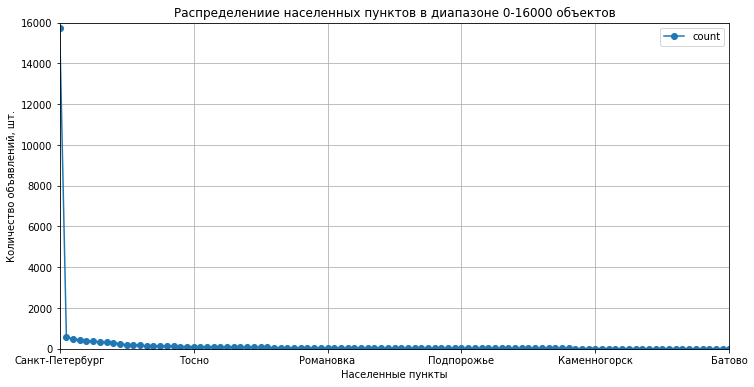

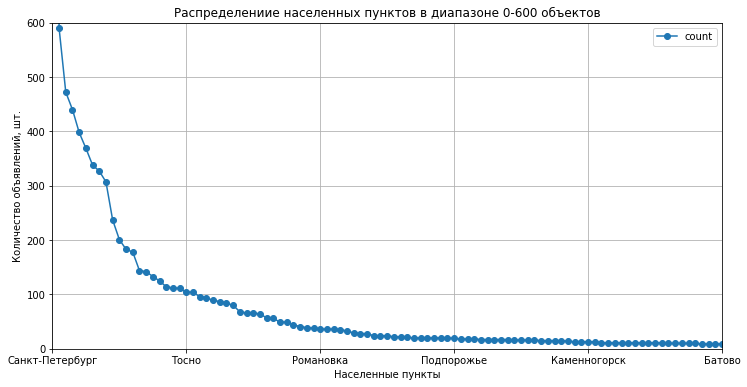

In [80]:
ax1 = df_local_count.plot(title='Распределениие населенных пунктов в диапазоне 0-16000 объектов',
                          style='o-', 
                          xlim = (0, 100), 
                          ylim = (0, 16000), 
                          grid=True, 
                          figsize=(12, 6)
                         )

ax2 = df_local_count.plot(title='Распределениие населенных пунктов в диапазоне 0-600 объектов',
                         style='o-', 
                         xlim = (0, 100), 
                         ylim = (0, 600), 
                         grid=True, 
                         figsize=(12, 6)
                        )
#  Добавляем подписи к осям:
ax1.set_xlabel('Населенные пункты')
ax1.set_ylabel('Количество объявлений, шт.')

#  Добавляем подписи к осям:
ax2.set_xlabel('Населенные пункты')
ax2.set_ylabel('Количество объявлений, шт.')
plt.show()



В датасете присутствуют населенные пункты с 1 объектом, это свойственно для небольших населенных пунктов. Максимальное количество публикаций у г. Санкт-Петербург.

Проверим среднюю и медианную продолжительность продажи объекта по кажому населенному пункту:

In [81]:
df_exp_mean = (df
               .query('days_exposition > 0')
               .pivot_table(index='locality_name', 
                                 values='days_exposition',
                              aggfunc={'days_exposition':['median', 'mean', 'count']})
               .sort_values(by='mean', 
                               ascending=False)
              )
df_exp_mean

,count,mean,median
locality_name,,,
Севастьяново,1,1069.000,1069.000
Рабитицы,1,1007.000,1007.000
Молодёжное,3,786.000,1043.000
Коробицыно,1,750.000,750.000
Большая Пустомержа,1,627.000,627.000
...,...,...,...
Шум,1,9.000,9.000
Садко,1,7.000,7.000
Счастье,1,7.000,7.000


Видим населенные пункты с единственным объявлением и большой длительностью продажи, также присутствуют населенные пункты с единственным объявлением и очень коротким временем продажи. Данные населенные пункты не репрезентативны.

Отсортируем населенные пункты по отношению среднего к медиане:

In [82]:
df_exp_mean['median_mean_rate'] = df_exp_mean['mean'] / df_exp_mean['median']
df_exp_mean.sort_values(by='median_mean_rate', 
                               ascending=False).head(20)

,count,mean,median,median_mean_rate
locality_name,,,,
Заневка,3,278.333,28.000,9.940
Юкки,3,305.667,47.000,6.504
Агалатово,3,223.667,42.000,5.325
Никольский,6,225.333,45.000,5.007
Яльгелево,3,33.667,7.000,4.810
Малые Колпаны,6,175.000,39.000,4.487
Победа,3,105.667,24.000,4.403
Лисий Нос,3,518.000,119.000,4.353
Гаврилово,5,153.800,45.000,3.418


Видим населенные пункты с большим отношением средней длительности продажи к медиане.

Посмотрим на распределение публикаций:

- по годам

In [83]:
df_calc.year_exposition.value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

- по месяцам суммарно за весь период:

In [84]:
df_calc.month_exposition.value_counts()

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_exposition, dtype: int64

- по месяцам за весь период:

In [85]:
(df_calc
 .groupby(['year_exposition', 'month_exposition'], as_index=False)['days_exposition']
 .agg(['median','count'])
)

median  count
year_exposition month_exposition                
2014            11               1069.000     17
                12                869.000    102
2015            1                 723.500     58
                2                 900.500     58
                3                 876.500    108
                4                 580.500     48
                5                 599.000     61
                6                 579.000     88
                7                 551.000     93
                8                 502.000     83
                9                 820.000     83
                10                389.000    142
                11                436.000    148
                12                333.000    151
2016            1                 285.000    121
                2                 230.000    249
                3                 211.000    341
                4                 163.500    414
                5                 119.000    428
                6                 112.500    460
                7                 376.000    138
                8                 467.000     81
                9                 449.000    119
                10                466.000    117
                11                440.000    129
                12                401.000    119
2017            1                 181.000    277
                2                 139.000    421
                3                 335.000    211
                4                 132.000    634
                5                 114.000    546
                6                 122.000    654
                7                 116.000    565
                8                 101.000    713
                9                 102.000    969
                10                100.000    893
                11                 74.000   1186
                12                 63.000    850
2018            1                  72.000    560
                2                  76.000   1268
                3                  77.500    958
                4                 116.000    263
                5                 156.000    123
                6                  88.000    480
                7                  66.000    783
                8                  60.000    735
                9                  57.000    679
                10                 50.000    782
                11                 43.000    677
                12                 49.000    252
2019            1                  45.000    275
                2                  39.000    285
                3                  19.000    356
                4                   9.000    166
                5                   1.000      1

Наблюдаем снижение средней продолжительности продажи объекта со временем.

 Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограммы для каждого параметра

**Площадь**

Посмотрим на описательную статистику:

In [86]:
df_calc.total_area.describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

и построим гистограмму:

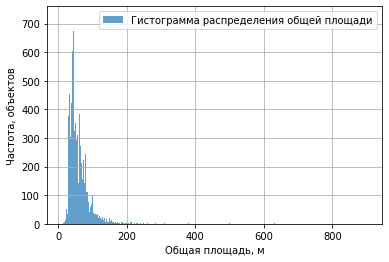

In [87]:
ax = df_calc.plot(
    kind='hist',
    y='total_area',
#    range=(0, 500),
    bins=1000,
    linewidth=5,
    alpha=0.7,
    label='Гистограмма распределения общей площади',
    grid=True,
    legend=True
)
#  Добавляем подписи к осям:
ax.set_xlabel('Общая площадь, м')
ax.set_ylabel('Частота, объектов')
plt.show()

<AxesSubplot:xlabel='total_area', ylabel='Count'>

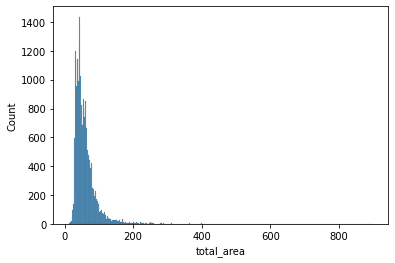

In [88]:
sns.histplot(data=df_calc, x="total_area")

Видим нормальное распределение, проверим на выбросы:

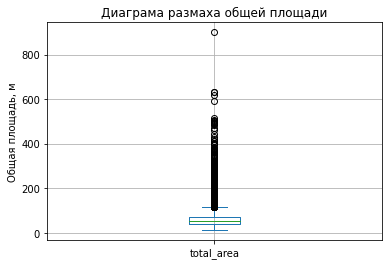

In [89]:
ax = df_calc.plot(kind = 'box', 
                  y='total_area', 
                  title='Диаграма размаха общей площади', 
                  grid=True
                 )
#  Добавляем подписи к осям:
ax.set_ylabel('Общая площадь, м')
plt.show()

На диаграме размаха есть явные выбросы, проверим количество квартир с большой площадью:

In [90]:
(print('Отношение выбросов к общему количеству строк: {:.3%}'
       .format(df_calc.query('total_area > 300').shape[0] / df_calc.total_area.shape[0])))

Отношение выбросов к общему количеству строк: 0.257%


Меньше 0.5%

Внимательно посмотрим на объекты с площадью более 300 метров, возможно метраж введен ошибочно.

In [91]:
(df_calc.query('total_area > 300')
 .pivot_table(index='locality_name', 
              values=['total_area', 'last_price', 'rooms', 'price_per_meter'], 
              aggfunc=['min', 'mean', 'max']))

min                                           mean  \
                last_price price_per_meter rooms total_area    last_price   
locality_name                                                               
Колпино           36900000      106187.050     8    347.500  36900000.000   
Красное Село      14000000       43750.000     6    320.000  14000000.000   
Пушкин            35000000       92105.263     6    374.000  38500000.000   
Санкт-Петербург   19500000       43402.778     0    301.900 102358290.947   

                                                        max                  \
                price_per_meter rooms total_area last_price price_per_meter   
locality_name                                                                 
Колпино              106187.050 8.000    347.500   36900000      106187.050   
Красное Село          43750.000 6.000    320.000   14000000       43750.000   
Пушкин               102202.364 6.500    377.000   42000000      112299.465   
Санкт-Петербург      243150.092 6.509    411.894  763000000     1907500.000   

                                  
                rooms total_area  
locality_name                     
Колпино             8    347.500  
Красное Село        6    320.000  
Пушкин              7    380.000  
Санкт-Петербург    19    900.000

Данные выглядят вполне правдоподобно, вряд ли здесь присутствует ошибка ввода.

Построим гистограмму ограничив общую площадь до 300 м для наглядности, однако не стоит пренебрегать значениями выше 300 метров для статистики:

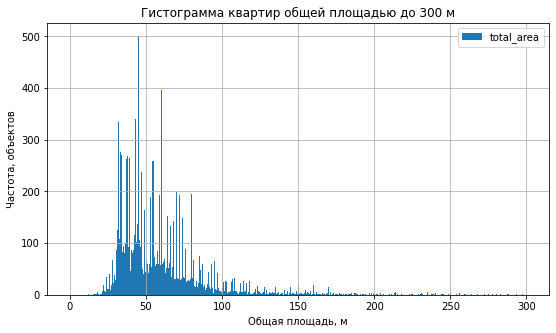

In [92]:
ax = df_calc.plot(kind='hist', 
                  y='total_area',
                  bins=1000,
                  range=(0,300),  
                  grid=True, 
                  figsize=(9,5), 
                  title='Гистограмма квартир общей площадью до 300 м')

#  Добавляем подписи к осям:
ax.set_xlabel('Общая площадь, м')
ax.set_ylabel('Частота, объектов')
plt.show()

Построим график зависимости средней цены от площади

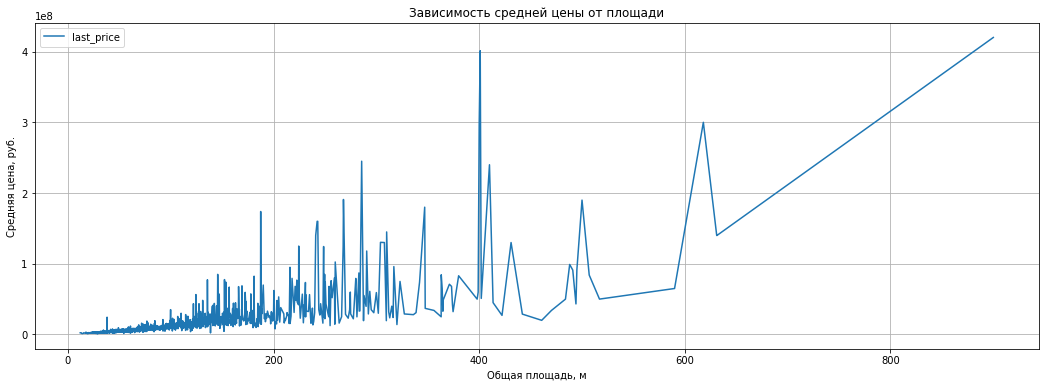

In [93]:
ax = (df_calc
 .pivot_table(index='total_area', values='last_price')
 .reset_index()
 .plot(x='total_area', 
       y='last_price', 
       grid=True, 
       figsize=(18,6),
       title='Зависимость средней цены от площади')
)

#  Добавляем подписи к осям:
ax.set_xlabel('Общая площадь, м')
ax.set_ylabel('Средняя цена, руб.')
plt.show()

Видим рост цен в зависимости от увелничения общей площади квартиры

**Цена**

Посмотрим на описательную статистику:

In [94]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [95]:
df_calc.last_price.describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

Построим гистограмму:

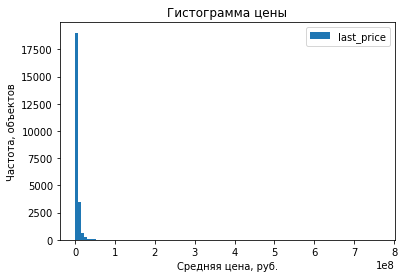

In [96]:
ax = df_calc.plot(kind='hist', y = 'last_price', bins=100, title='Гистограмма цены')
#  Добавляем подписи к осям:
ax.set_xlabel('Средняя цена, руб.')
ax.set_ylabel('Частота, объектов')
plt.show()

Видим большой разброс цены, проверим на выбросы:

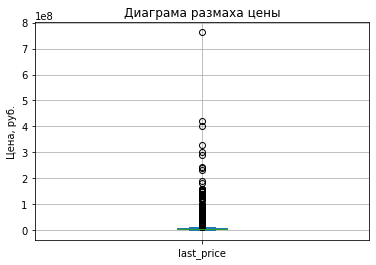

In [97]:
ax = df_calc.plot(kind = 'box', 
                  y='last_price', 
                  title='Диаграма размаха цены', 
                  grid=True
                 )
#  Добавляем подписи к осям:
ax.set_ylabel('Цена, руб.')
plt.show()

Внимательно посмотрим на объекты со стоимостью более 15 млн, возможно метраж введен ошибочно.

In [98]:
(df_calc.query('last_price > 15000000')
 .pivot_table(index='locality_name', 
              values=['total_area', 'last_price', 'rooms'], 
              aggfunc=['min', 'mean', 'max', 'count']))

min                          mean                   \
                last_price rooms total_area   last_price rooms total_area   
locality_name                                                               
Бор               20295200     6    192.300 20295200.000 6.000    192.300   
Всеволожск        24412900     1     38.120 24412900.000 1.000     38.120   
Выборг            19990000     4    186.000 19990000.000 4.000    186.000   
Другой            16000000     1     89.500 18680537.000 2.500    137.700   
Зеленогорск       17212500     2     71.000 20106250.000 2.000     73.750   
Колпино           36900000     8    347.500 36900000.000 8.000    347.500   
Красное Село      21000000     4    215.000 21000000.000 4.000    215.000   
Кронштадт         17630000     4    168.000 17630000.000 4.000    168.000   
Петергоф          22000000     4    161.800 22000000.000 4.000    167.900   
Пушкин            15500000     2    101.900 22742350.000 3.611    175.956   
Репино            28000000     3    160.000 28000000.000 3.000    160.000   
Санкт-Петербург   15093000     0     33.000 32712931.540 3.809    156.051   
Сестрорецк        15300000     3     92.200 17411666.667 3.333    123.900   
Стрельна          15500000     4    204.000 16650000.000 4.000    209.600   

                       max                       count                   
                last_price rooms total_area last_price rooms total_area  
locality_name                                                            
Бор               20295200     6    192.300          1     1          1  
Всеволожск        24412900     1     38.120          1     1          1  
Выборг            19990000     4    186.000          1     1          1  
Другой            24000000     4    178.300          4     4          4  
Зеленогорск       23000000     2     76.500          2     2          2  
Колпино           36900000     8    347.500          1     1          1  
Красное Село      21000000     4    215.000          1     1          1  
Кронштадт         17630000     4    168.000          1     1          1  
Петергоф          22000000     4    174.000          2     2          2  
Пушкин            42000000     7    380.000         18    18         18  
Репино            28000000     3    160.000          1     1          1  
Санкт-Петербург  763000000    19    900.000       1163  1163       1163  
Сестрорецк        21700000     4    214.000          6     6          6  
Стрельна          17800000     4    215.200          2     2          2

Ограничим гистограмму до 15 млн для наглядности, пренебрегать данными свыше не целесообразно, так как нет очевидных аномалий в стоимости объектов.

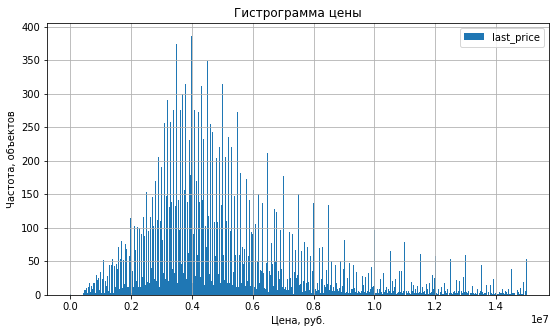

In [99]:
ax = df_calc.plot(y = 'last_price',
             kind = 'hist', 
             range=(0, 15000000), 
             bins=500, 
             grid=True, 
             figsize=(9,5),
             title='Гистрограмма цены'
            )

#  Добавляем подписи к осям:
ax.set_xlabel('Цена, руб.')
ax.set_ylabel('Частота, объектов')
plt.show()

Распределение нормальное, что также подтверждает реальность данных.

**Число комнат**

Применим описательную статистику:

In [100]:
df_calc.rooms.describe()

count   23699.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

Посчитаем количество объектов с определенным количеством комнат

In [101]:
df_calc.rooms.value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Построим гистограмму

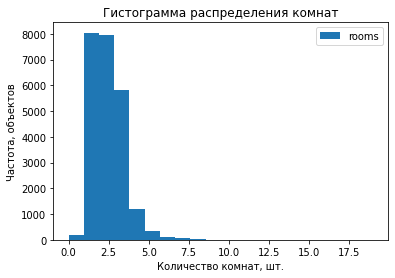

In [102]:
ax = df_calc.plot(kind='hist', y = 'rooms', bins=20, title='Гистограмма распределения комнат')
#  Добавляем подписи к осям:
ax.set_xlabel('Количество комнат, шт.')
ax.set_ylabel('Частота, объектов')
plt.show()

и диаграмму ящик с усами

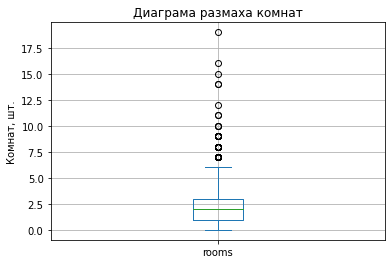

In [103]:
ax = df_calc.plot(kind = 'box', 
                  y='rooms', 
                  title='Диаграма размаха комнат', 
                  grid=True
                 )
#  Добавляем подписи к осям:
ax.set_ylabel('Комнат, шт.')
plt.show()

Видим выбросы у объектов с более чем 6-ю комнатами, распределение нормальное, также без существенных аномалий.

Построим график зависимости средней цены от количества комнат

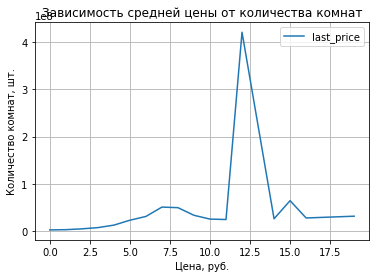

In [104]:
ax = (df_calc
 .pivot_table(index='rooms', values='last_price')
 .reset_index()
 .plot(x='rooms', 
       y='last_price', 
       grid=True,
       title='Зависимость средней цены от количества комнат')
)

#  Добавляем подписи к осям:
ax.set_xlabel('Цена, руб.')
ax.set_ylabel('Количество комнат, шт.')
plt.show()

Видим рост цен при увеличении количества комнат, 12 комнатаная квартира выделяется на фоне остальных.

**Высота потолков**

Применим описательную статистику:

In [105]:
df_calc.ceiling_height.describe()

count   23699.000
mean        2.724
std         0.988
min         1.000
25%         2.600
50%         2.650
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64

Отсортируем высоту потолков по возрастанию 

In [106]:
df_calc.ceiling_height.sort_values(ascending=True).head(10)

22590   1.000
5712    1.200
16934   1.750
20520   2.000
552     2.000
4212    2.000
5850    2.000
16884   2.000
19098   2.000
16446   2.000
Name: ceiling_height, dtype: float64

и убыванию

In [107]:
df_calc.ceiling_height.sort_values(ascending=False).head(10)

22869   100.000
3148     32.000
22336    32.000
21377    27.500
4876     27.000
17857    27.000
5246     27.000
20478    27.000
22938    27.000
5807     27.000
Name: ceiling_height, dtype: float64

построим гистограмму

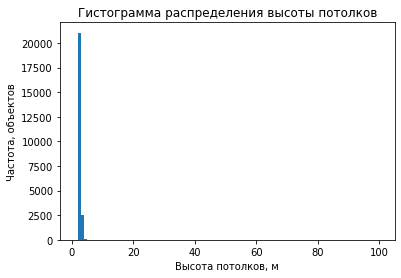

In [108]:
ax = df_calc.ceiling_height.plot(kind = 'hist', bins=100, title='Гистограмма распределения высоты потолков')
#  Добавляем подписи к осям:
ax.set_xlabel('Высота потолков, м')
ax.set_ylabel('Частота, объектов')
plt.show()

а также диагрмму ящик с усами

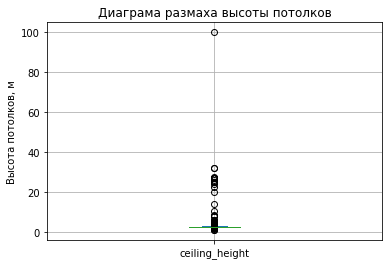

In [109]:

ax = df_calc.plot(kind = 'box', 
                  y='ceiling_height', 
                  title='Диаграма размаха высоты потолков', 
                  grid=True
                 )
#  Добавляем подписи к осям:
ax.set_ylabel('Высота потолков, м')
plt.show()

На графике ящик с усами видим явные выбросы, проверим их количество.

Максимальный уровень потолков СНиП не регламентируют. Предположим, что максимальная высота для жилой недвижимости не превышает 10 метров. Проанализируем значения выше 10 метров:

In [110]:
df_calc[df_calc['ceiling_height'] > 10.0].ceiling_height.value_counts()

27.000     8
25.000     7
32.000     2
24.000     1
26.000     1
14.000     1
20.000     1
22.600     1
27.500     1
10.300     1
100.000    1
Name: ceiling_height, dtype: int64

In [111]:
(print('Отношение выбросов к общему количеству строк: {:.3%}'
       .format(df_calc.query('ceiling_height > 10')
               .shape[0] / df_calc.ceiling_height.shape[0])))

Отношение выбросов к общему количеству строк: 0.105%


 Значения высоты потолков выше 10 метров рассмотрим как ошибку ввода и поделим на 10:

In [112]:
df_calc['ceiling_height'] = df_calc['ceiling_height'].apply(lambda x : x / 10 if (x > 10) else x)

Проверим распределение высоты потолков после корректировки:

In [113]:
df_calc['ceiling_height'].describe()

count   23699.000
mean        2.698
std         0.238
min         1.000
25%         2.600
50%         2.650
75%         2.700
max        10.000
Name: ceiling_height, dtype: float64

Проверим значения ниже минимальной нормы высоты потолков, это может быть мансарда или антресоли.

In [114]:
df_calc[df_calc['ceiling_height'] < 2.4].ceiling_height.value_counts()

2.000    12
2.300     4
2.340     1
1.200     1
2.200     1
1.400     1
1.750     1
2.250     1
2.260     1
1.030     1
1.000     1
Name: ceiling_height, dtype: int64

Внимательно посмотрим на другие характеристики и оценим правдоподобность данных:

In [115]:
df_calc[df_calc['ceiling_height'] < 2.4].iloc[:,[1,2,5]].groupby('ceiling_height').agg(['mean','min','max','count'])

last_price                          total_area                \
                      mean      min       max count       mean    min    max   
ceiling_height                                                                 
1.000          6000000.000  6000000   6000000     1     55.000 55.000 55.000   
1.030          5300000.000  5300000   5300000     1     45.000 45.000 45.000   
1.200          1500000.000  1500000   1500000     1     42.800 42.800 42.800   
1.400          5600000.000  5600000   5600000     1     56.400 56.400 56.400   
1.750          4100000.000  4100000   4100000     1     40.000 40.000 40.000   
2.000          3605750.000  1500000  12300000    12     50.352 33.000 92.900   
2.200          1400000.000  1400000   1400000     1     22.500 22.500 22.500   
2.250          2300000.000  2300000   2300000     1     58.600 58.600 58.600   
2.260          5950000.000  5950000   5950000     1     60.000 60.000 60.000   
2.300          2550000.000  1600000   4100000     4     52.475 45.600 56.000   
2.340          2200000.000  2200000   2200000     1     47.000 47.000 47.000   

                      
               count  
ceiling_height        
1.000              1  
1.030              1  
1.200              1  
1.400              1  
1.750              1  
2.000             12  
2.200              1  
2.250              1  
2.260              1  
2.300              4  
2.340              1

Объектов с высотой потолков менее 2 метров очень мало, при этом площадь объекта стандартная, данные выглядят не правдоподобно. Заменим высоту потолков менее двух метров на медианные значения.

In [116]:
median_ceiling_height = df_calc['ceiling_height'].median()

In [117]:
df_calc['ceiling_height'] = df_calc['ceiling_height'].apply(lambda x : median_ceiling_height if (x < 2) else x)

Проверим описательные статистики и построим гистограмму после изменений:

In [118]:
df_calc['ceiling_height'].describe()

count   23699.000
mean        2.698
std         0.237
min         2.000
25%         2.600
50%         2.650
75%         2.700
max        10.000
Name: ceiling_height, dtype: float64

Ограничим лимиты гистограммы для наглядности:

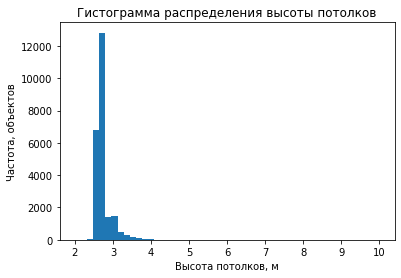

In [119]:
ax = df_calc.ceiling_height.plot(kind = 'hist', 
                                 bins=50, 
                                 title='Гистограмма распределения высоты потолков')
#  Добавляем подписи к осям:
ax.set_xlabel('Высота потолков, м')
ax.set_ylabel('Частота, объектов')
plt.show()

Выбросы исправлены, как слишком больших значений, так и малых.

Построим график зависимости цены от высоты потолков

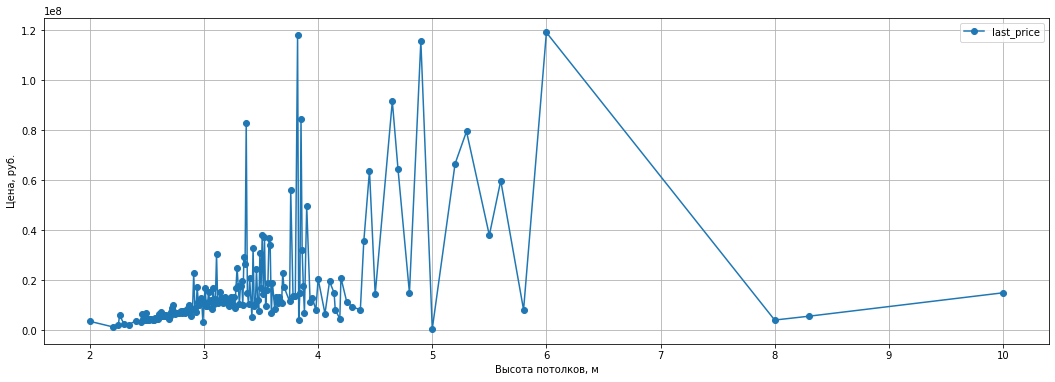

In [120]:
ax = (df_calc
 .pivot_table(index='ceiling_height', values='last_price')
 .reset_index()
 .plot(x='ceiling_height', y='last_price', grid=True, figsize=(18,6), style='o-')
)

ax.set_xlabel('Высота потолков, м')
ax.set_ylabel('Цена, руб.')
plt.show()

Видим увеличение стоимости при увеличении высоты потолков, однако стоит обратить внимание на объекты высотой более 8 метров, они выбиваются из статистики и имеют низкую стоимость, вполне возможно здесь ошибка в данных либо это случайно попавший коммерческий объект.

**Вывод**

Проанализировали общую площадь объектов, цену, количество комнат и высоту потолков. Общая площадь квартир имеет достаточно большой разброс, стандартное отклонение - 35 метров, тем не менее среднее не значительно отличается от медианы. Данные выглядят достаточно правдоподобно, большая площадь - высокая цена. Также обстоят дела со стоимостью объектов. Количество комнат в пределах нормы. Данные о высоте потолков имели чрезмерные выбросы, максимальные занчения похожи на ошиибку ввода, они были математически преобразованы и приближены к медиане, значения менее 2 метров заменены на медиану.

**Время продажи квартиры**

Проанализируем время продажи квартиры. 

Посчитаем описательные статистики, среднее и медиану. 

In [121]:
df_calc.days_exposition.describe()

count   20518.000
mean      180.889
std       219.728
min         1.000
25%        45.000
50%        95.000
75%       232.000
max      1580.000
Name: days_exposition, dtype: float64

Среднее выше медианы почти в 2 раза. В распределении длинный хвост высоких значений (или несколько очень больших значений), влияющих на среднее, но не на медиану.

Построим гистограмму

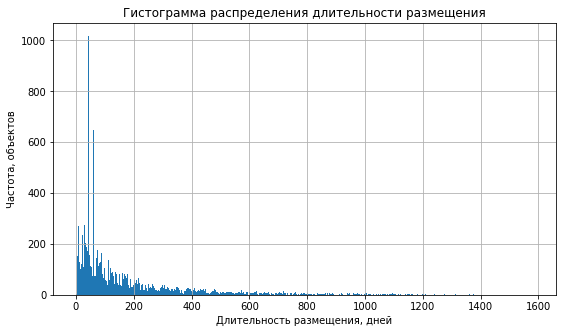

In [122]:
ax = df_calc.days_exposition.plot(kind = 'hist', 
                                  bins=1000, 
                                  figsize=(9,5), 
                                  grid=True,
                                  title='Гистограмма распределения длительности размещения')
#  Добавляем подписи к осям:
ax.set_xlabel('Длительность размещения, дней')
ax.set_ylabel('Частота, объектов')
plt.show()

Обратим внимание на пики диаграммы:

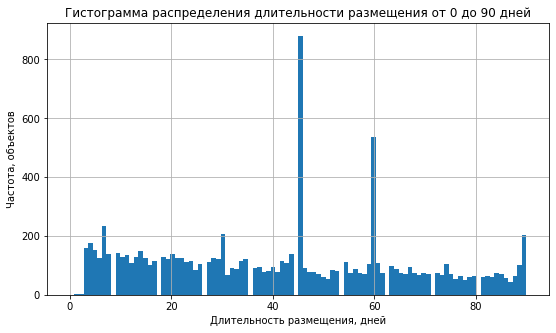

In [123]:
ax = df_calc.days_exposition.plot(kind = 'hist', 
                                  bins=100, 
                                  figsize=(9,5), 
                                  range=(0,90),
                                  grid=True,
                                  title='Гистограмма распределения длительности размещения от 0 до 90 дней')
#  Добавляем подписи к осям:
ax.set_xlabel('Длительность размещения, дней')
ax.set_ylabel('Частота, объектов')
plt.show()

Посмотрим на топ-10 продолжительности публикаций:

In [124]:
df_calc.days_exposition.value_counts().head(10)

45.000    880
60.000    538
7.000     234
30.000    208
90.000    204
4.000     176
3.000     158
5.000     152
14.000    148
9.000     143
Name: days_exposition, dtype: int64

Пиковые значения на 7, 30, 45, 60 и 90 дней, больше похоже на снятие объявлений в связи с окончанием платного размещения.

Избавимся от выбросов:

In [125]:
def drop_index(x):
  df_calc.drop(df_calc[df_calc.days_exposition == x].index, inplace=True)

drop_index(7)
drop_index(30)
drop_index(45)
drop_index(60)
drop_index(90)

Проверим результат:

In [126]:
df_calc.days_exposition.value_counts().head(10)

4.000     176
3.000     158
5.000     152
14.000    148
9.000     143
8.000     139
20.000    139
44.000    138
11.000    135
18.000    129
Name: days_exposition, dtype: int64

Построим диаграмму размаха длительности продажи:

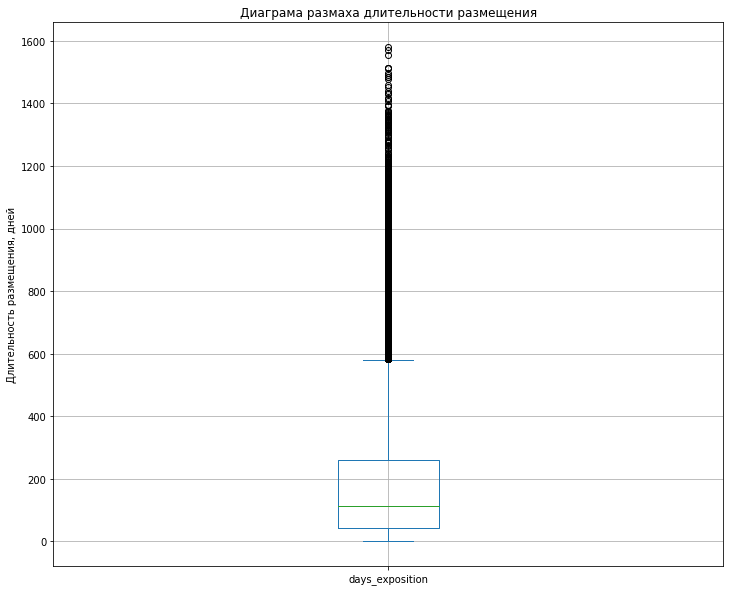

In [127]:
ax = df_calc.plot(kind = 'box', 
                  y='days_exposition', 
                  title='Диаграма размаха длительности размещения', 
                  grid=True,
                  figsize = (12,10)
                 )
#  Добавляем подписи к осям:
ax.set_ylabel('Длительность размещения, дней')
plt.show()

Выбросы свыше 600 дней. Проверим количество таких объявлений:

In [128]:
(print('Соотношение выбросов к общему количеству строк: {:.3%}'
       .format(df_calc[df_calc['days_exposition'] > 600].shape[0] / df.days_exposition.shape[0])))

Соотношение выбросов к общему количеству строк: 5.537%


Видим длинный хвост значений. Посмотрим на объекты с самым долгим временем продажи:

In [129]:
(df_calc.loc[:,['locality_name','last_price','days_exposition']]
 .sort_values(by='days_exposition', ascending=False)
 .head(10))

,locality_name,last_price,days_exposition
18843,Новое Девяткино,3500000,1580.000
1109,Санкт-Петербург,34878556,1572.000
9553,Санкт-Петербург,10600000,1553.000
1885,Санкт-Петербург,13300000,1513.000
20969,Санкт-Петербург,13300000,1512.000
6691,Пушкин,4400000,1512.000
14093,Санкт-Петербург,9500000,1497.000
15313,Сестрорецк,9278000,1489.000
19123,Павловск,5990000,1485.000
11955,Санкт-Петербург,11400000,1484.000


Это объекты из разных населенных пунктов с разным порядком цен. Посмотрим на количество объектво в Санкт-Петербурге и деревне Новое Девяткино:

In [130]:
df_calc.locality_name.value_counts().head(15)

Санкт-Петербург    14497
Мурино               542
Кудрово              423
Шушары               391
Всеволожск           364
Пушкин               345
Колпино              303
Парголово            286
Гатчина              280
Выборг               207
Петергоф             186
Красное Село         169
Сестрорецк           163
Новое Девяткино      133
Сертолово            130
Name: locality_name, dtype: int64

Данные значительно отличаются, количество объектов в Санкт-Петербурге больше всего в датасете, сделаем срез по городу и изучим детальнее продолжительность продажи.

In [131]:
sample_city = df_calc.query('locality_name == "Санкт-Петербург"')

Построим гистограмму полученного среза:

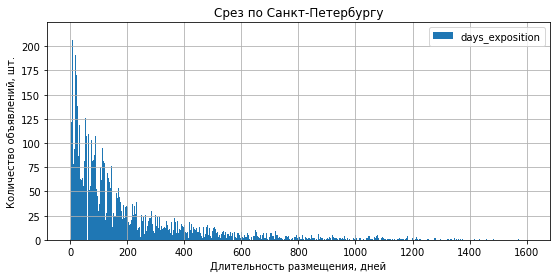

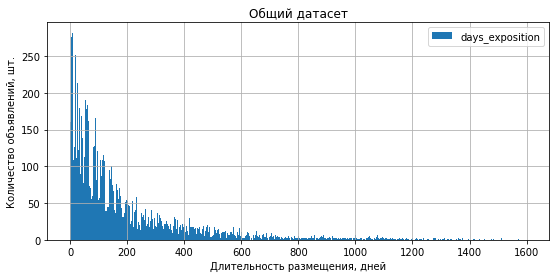

In [132]:
ax1 = sample_city.plot(kind='hist', 
                 y='days_exposition', 
                 bins = 1000, 
                 range = (0,1600), 
                 figsize=(9,4), 
                 grid=True, 
                 title='Срез по Санкт-Петербургу')
ax2 = df_calc.plot(kind='hist', 
             y='days_exposition', 
             bins = 1000, 
             range = (0,1600), 
             figsize=(9,4), 
             grid=True, 
             title='Общий датасет')

#  Добавляем подписи к осям:
ax1.set_xlabel('Длительность размещения, дней')
ax1.set_ylabel('Количество объявлений, шт.')

#  Добавляем подписи к осям:
ax2.set_xlabel('Длительность размещения, дней')
ax2.set_ylabel('Количество объявлений, шт.')
plt.show()


Гистограммы среза и общего набора данных внешне похожи. Мы избавились от пиков в 7, 14, 45, 60, 90 дней, вероятнее всего это дни окончания платного размещения объявления. Видим, что после 1000 дней количество публикаций стремится к 0, предположим, что это неликвидные объекты, либо так называемые "фонари" риэлторов, размещенные для привлечения покупателей. 

In [133]:
(print('Соотношение длительных продаж к общему количеству строк: {:.3%}'
       .format(df_calc[df_calc['days_exposition'] > 1000].shape[0] / df.days_exposition.shape[0])))

Соотношение длительных продаж к общему количеству строк: 1.276%


Отбросив значения свыше 1000 мы не потеряем много данных

Построим график зависимости продолжительности продажи от даты публикации объявления и ограничим 1000 днями

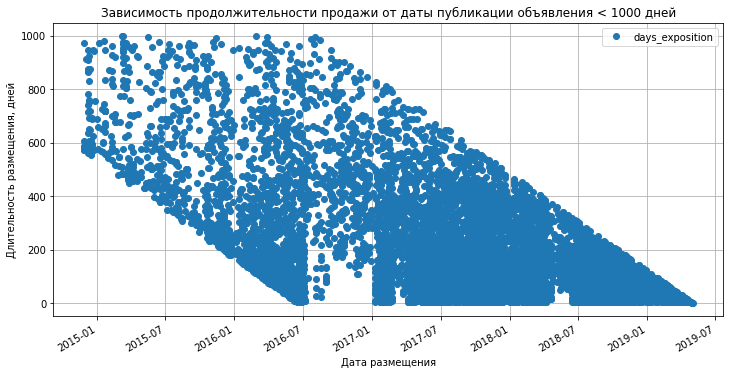

In [134]:
ax = (sample_city
      .query('days_exposition < 1000')
      .plot(x='first_day_exposition', 
            y='days_exposition', 
            style='o', 
            grid=True, 
            figsize=(12, 6),
            title='Зависимость продолжительности продажи от даты публикации объявления < 1000 дней')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Дата размещения')
ax.set_ylabel('Длительность размещения, дней')
plt.show()


На графике видна подозрительно ровная тенденция к снижению времени продажи объектов. Видим также отсутствие коротких продаж в период с 2016-07 по 2017-01. Рассмотрим детальнее этот промежуток времени.

In [135]:
sample_city.query('"2017-01-01T00:00:00" > first_day_exposition > "2016-07-01T00:00:00"').days_exposition.describe()

count    482.000
mean     446.772
std      220.481
min        8.000
25%      287.000
50%      432.000
75%      593.250
max     1001.000
Name: days_exposition, dtype: float64

Видим минимальные и максимальные значения. Построим график и гистограмму:

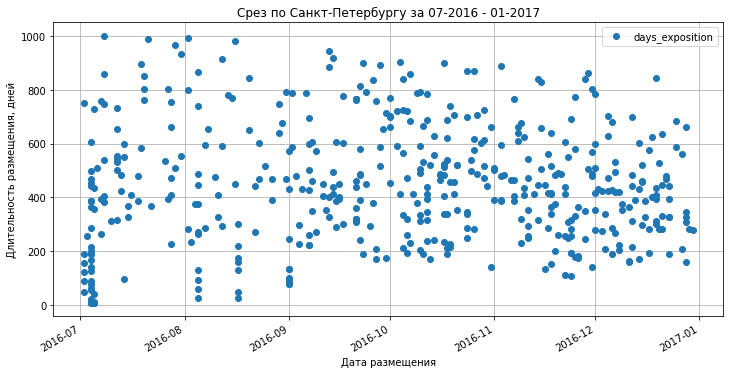

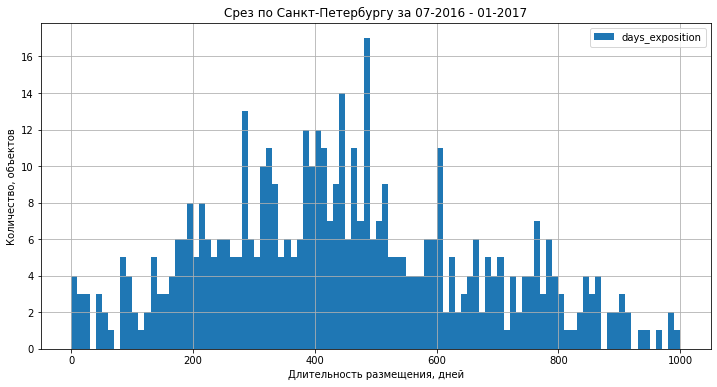

In [136]:
ax1 = (sample_city
 .query('"2017-01-01T00:00:00" > first_day_exposition > "2016-07-01T00:00:00"')
 .plot(x='first_day_exposition',
       y='days_exposition',
       style='o', 
       grid=True, 
       figsize=(12, 6),
       title='Срез по Санкт-Петербургу за 07-2016 - 01-2017')
      )

ax2 = (sample_city
 .query('"2017-01-01T00:00:00" > first_day_exposition > "2016-07-01T00:00:00"')
 .plot(kind='hist',
       y='days_exposition', 
       bins = 100, 
       range = (0,1000),
       figsize=(12,6), 
       grid=True, 
       title='Срез по Санкт-Петербургу за 07-2016 - 01-2017'))

#  Добавляем подписи к осям:
ax1.set_xlabel('Дата размещения')
ax1.set_ylabel('Длительность размещения, дней')

#  Добавляем подписи к осям:
ax2.set_xlabel('Длительность размещения, дней')
ax2.set_ylabel('Количество, объектов')
plt.show()

Распределение на этом отрезке более похоже на реальные данные, ограничим нижний диапазон продолжительности продажи 8 днями

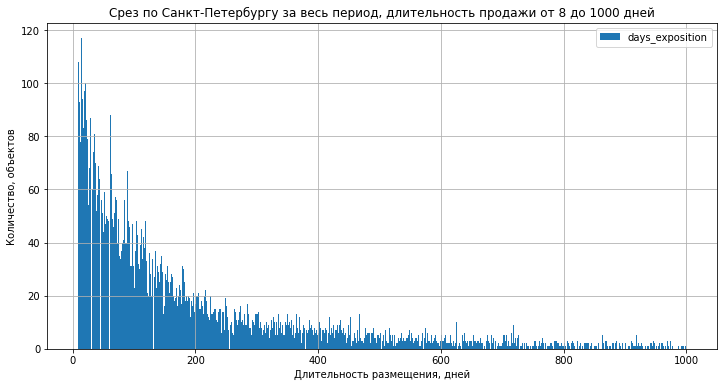

In [137]:
#нижняя граница дней
low_limit_day = 8

ax = (sample_city
 .query('@low_limit_day < days_exposition < 1000')
 .plot(kind='hist',
       y='days_exposition', 
       bins = 1000, 
       range = (8,1000),
       figsize=(12,6), 
       grid=True, 
       title='Срез по Санкт-Петербургу за весь период, длительность продажи от 8 до 1000 дней'))

#  Добавляем подписи к осям:
ax.set_xlabel('Длительность размещения, дней')
ax.set_ylabel('Количество, объектов')
plt.show()

In [138]:
(print('Соотношение коротких продаж к общему количеству строк: {:.3%}'
       .format(df_calc[df_calc['days_exposition'] < low_limit_day].shape[0] / df.days_exposition.shape[0])))

Соотношение коротких продаж к общему количеству строк: 2.838%


Проверим соотношение объектов с быстрыми и долгими продажами в каждом из населенных пунктов:

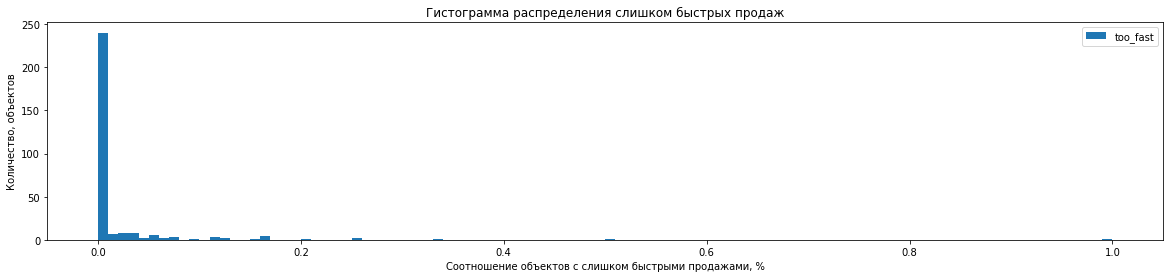

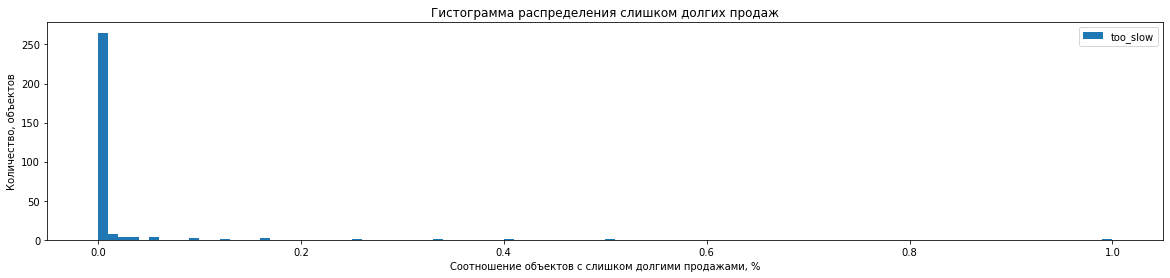

In [139]:
df_calc['too_fast'] = df_calc['days_exposition'] < low_limit_day
too_fast_stat = df_calc.pivot_table(index='locality_name', values='too_fast')

ax1 = too_fast_stat.plot(kind = 'hist', 
                        bins=100, 
                        figsize=(20,4),
                        title='Гистограмма распределения слишком быстрых продаж')

#  Добавляем подписи к осям:
ax1.set_xlabel('Соотношение объектов с слишком быстрыми продажами, %')
ax1.set_ylabel('Количество, объектов')

df_calc['too_slow'] = df_calc['days_exposition'] > 1000
too_slow_stat = df_calc.pivot_table(index='locality_name', values='too_slow')

ax2 = too_slow_stat.plot(kind = 'hist', 
                        bins=100, 
                        figsize=(20,4),
                        title='Гистограмма распределения слишком долгих продаж')
#  Добавляем подписи к осям:
ax2.set_xlabel('Соотношение объектов с слишком долгими продажами, %')
ax2.set_ylabel('Количество, объектов')
plt.show()

Видим, что менее 2% населенных пунктов имеют как слишком долгие, так и лишком короткие сроки продаж. Есть населенные пункты с 100% быстрых и долгих продаж.

Отберем только те локации доля объектов у которых c слишком быстрым временем продажи не превышает 20%

In [140]:
good_ids = too_fast_stat.query('too_fast < 0.2')
good_data = df_calc.query('locality_name in @good_ids.index')
print('Количество объектов всего: ', len(df_calc))
print('Количество объектов без населенных пунктов с слишком быстрыми продажами:', len(good_data))

Количество объектов всего:  21635
Количество объектов без населенных пунктов с слишком быстрыми продажами: 21600


Отберем также объекты сроки продажи которых не попадают в диапазон 8-1000 дней

In [141]:
good_data = good_data.query('@low_limit_day <= days_exposition <= 1000')
print('Количество объектов без слишком долгих и коротких продаж:', len(good_data))

Количество объектов без слишком долгих и коротких продаж: 17545


Проверим изменилась ли медианная продолжительность продажи объектов:

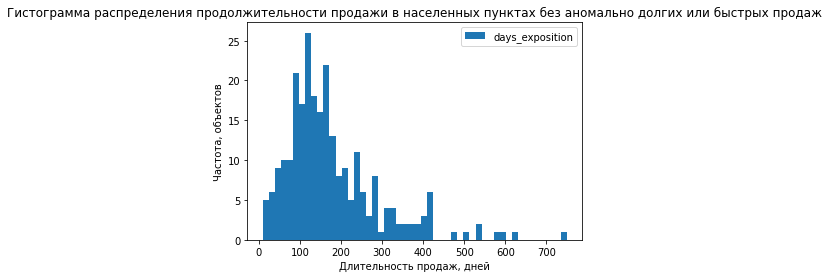

In [142]:
good_locality_stat = good_data.pivot_table(index='locality_name', values='days_exposition', aggfunc='median')

ax = (good_locality_stat
      .plot(kind = 'hist', 
            bins=50, 
            title='Гистограмма распределения продолжительности продажи в населенных пунктах без аномально долгих или быстрых продаж')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Длительность продаж, дней')
ax.set_ylabel('Частота, объектов')
plt.show()

Построим рейтинг, где каждому названию локации соответствует медианная продолжительность продажи

In [143]:
good_locality_stat.sort_values(by='days_exposition', ascending=True)

,days_exposition
locality_name,
Шум,9.000
Семиозерье,9.000
Малая Романовка,9.000
Платформа 69-й километр,18.000
Старое Хинколово,19.000
...,...
Первомайское,541.000
Никольский,586.000
Высоцк,595.000


Построим 2 гистограммы: по исходным данным raw (англ. «необработанный, сырой») и новым filtered (англ. «отфильтрованный»).

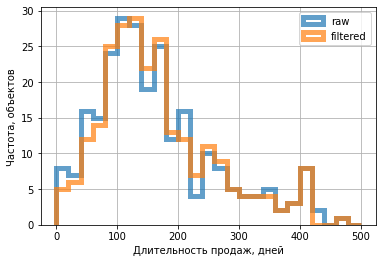

In [144]:
median_station_stat = df.pivot_table(
    index='locality_name', values='days_exposition', aggfunc='median'
)
good_station_stat = good_data.pivot_table(
    index='locality_name', values='days_exposition', aggfunc='median'
)

ax = median_station_stat.plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)
ax1 = good_locality_stat.plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
)

#  Добавляем подписи к осям:
ax1.set_xlabel('Длительность продаж, дней')
ax1.set_ylabel('Частота, объектов')
plt.show()


Видим, что внесенные изменения не существенно повлияли на медианные значения. Диаграмма реалистична, похожа на распределение Пуассона.

In [145]:
stat = df.pivot_table(index='locality_name', values='days_exposition')
good_stat = good_data.pivot_table(
    index='locality_name', values='days_exposition', aggfunc='median'
)
stat['good_days_exposition'] = good_stat['days_exposition']
stat

,days_exposition,good_days_exposition
locality_name,,
Агалатово,223.667,NaN
Александровская,112.000,112.000
Алексеевка,416.000,416.000
Аннино,333.800,205.500
Аро,137.000,137.000
...,...,...
Яльгелево,47.000,NaN
Ям-Тесово,120.000,120.000
Янино-1,145.698,82.000


После фильтрации исхдных данных и расчета медианы вместо среднего, типичная продолжительность продажи объекта в населенном пункте изменилась. Неодинаково в разных населенных пунктах.

Подсчитаем количество объектов в каждом населенном пункте

In [146]:
good_stat_object = good_data.pivot_table(
    index='locality_name', values='days_exposition', aggfunc='count'
)
good_stat_object.columns = ['count']
good_stat_object.sort_values(by='count', ascending=False)

,count
locality_name,
Санкт-Петербург,11776
Мурино,479
Кудрово,370
Шушары,348
Всеволожск,294
...,...
Малая Романовка,1
Лужайка,1
Лисий Нос,1


Сведем данные в итоговую таблицу:

In [147]:
final_stat = stat.join(good_stat_object)
final_stat.sort_values(by='count', ascending=False).head(10)

,days_exposition,good_days_exposition,count
locality_name,,,
Санкт-Петербург,195.933,114.500,11776.000
Мурино,158.740,89.000,479.000
Кудрово,173.569,91.500,370.000
Шушары,171.421,111.000,348.000
Всеволожск,213.970,145.500,294.000
Пушкин,223.837,154.500,266.000
Колпино,156.275,95.000,259.000
Парголово,172.548,106.000,244.000
Гатчина,205.452,132.500,230.000


In [148]:
final_stat.good_days_exposition.describe()

count   257.000
mean    177.132
std     117.704
min       9.000
25%     101.000
50%     147.000
75%     227.000
max     750.000
Name: good_days_exposition, dtype: float64

**Вывод**

Объем продаж с коротким временем не большой, можем отбросить эти данные. Примем короткие продажи за тестовые публикации, либо отклоненные системой за нарушения. Для более корректного анализа необходима информация снято объявление пользователем, либо отклонено сайтом, либо закончился срок размещения объявления. Не берем во внимание данные быстрых продаж, а также слишком долгих. В среднем продажа занимает 145 дней.

**Факторы влияющие на стоимость квартиры**

Исследуем какие факторы больше всего влияют на стоимость квартиры. 

**Цена от квадратного метра**

Коэффициент корреляции между ценой и общей площадью 0.641


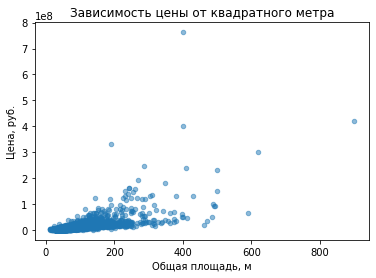

In [149]:
print('Коэффициент корреляции между ценой и общей площадью {:.3f}'\
      .format(good_data['last_price'].corr(good_data['total_area'])))
ax = (good_data
      .loc[ : ,['last_price', 'total_area']]
      .plot(y='last_price',
            x='total_area',
            kind='scatter',
            alpha=0.5,
            title='Зависимость цены от квадратного метра')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Общая площадь, м')
ax.set_ylabel('Цена, руб.')
plt.show()

Видим как с увеличением площади цена увеличивается, положительная корреляция.

**Цена от числа комнат**

Коэффициент корреляции между ценой и числом комнат 0.353


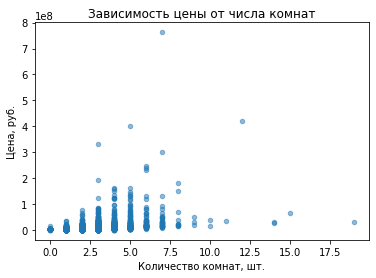

In [150]:
print('Коэффициент корреляции между ценой и числом комнат {:.3f}'.format(good_data['last_price'].corr(good_data['rooms'])))

ax = (good_data
      .loc[ : ,['last_price', 'rooms']]
      .plot(y='last_price', 
            x='rooms', 
            kind='scatter', 
            alpha=0.5,
            title='Зависимость цены от числа комнат')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Количество комнат, шт.')
ax.set_ylabel('Цена, руб.')
plt.show()

Цена положительно коррелирует с количеством комнат, проверим также на срезе данных одного города:

Коэффициент корреляции между ценой и числом комнат 0.635


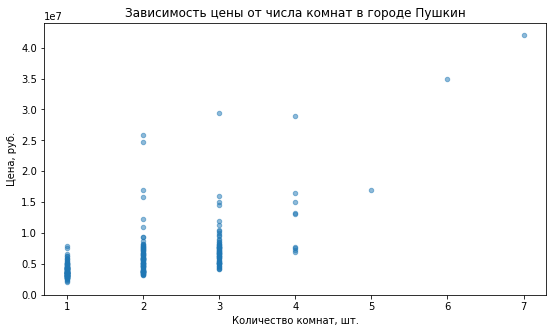

In [151]:
print('Коэффициент корреляции между ценой и числом комнат {:.3f}'.format(good_data.query('locality_name=="Пушкин"')['last_price'].corr(good_data['rooms'])))

ax = (good_data
      .query('locality_name=="Пушкин"')
      .loc[ : ,['last_price', 'rooms']]
      .plot(y='last_price', 
            x='rooms', 
            kind='scatter', 
            alpha=0.5,
            title='Зависимость цены от числа комнат в городе Пушкин',
            figsize=(9,5))
     )

#  Добавляем подписи к осям:
ax.set_xlabel('Количество комнат, шт.')
ax.set_ylabel('Цена, руб.')
plt.show()

5 комнатная квартира за городом может стоить гораздо дешевле студии в центре большого города, в рамках одной локации зависимость прослеживается лучше.

**Цена от этажа (первого или последнего)**

            last_price  floor_cat
last_price       1.000      0.082
floor_cat        0.082      1.000

       last_price  floor_cat
1         3350000          1
13        3550000          2
14        4400000          1
16        6700000          1
23        2950000          2
...           ...        ...
23658     3063600          2
23660     2950000          2
23663     6400000          1
23665     4250000          1
23673     3100000          1

[4609 rows x 2 columns]


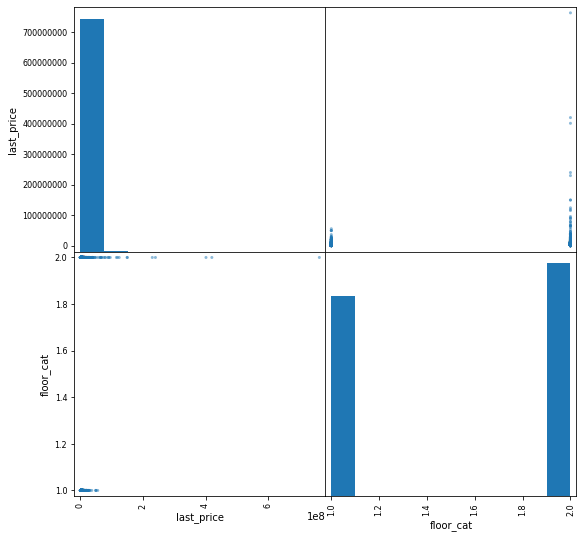

In [152]:
#выделим срез данных 
floor_corr = good_data.loc[ : ,['last_price', 'floor_cat']]

#заменим категориальные переменные на числа 
floor_corr.loc[floor_corr['floor_cat']=='Первый','floor_cat']=1
floor_corr.loc[floor_corr['floor_cat']=='Последний','floor_cat']=2
#удалим строки 
floor_corr.drop(floor_corr[floor_corr.floor_cat == 'Другой'].index, inplace=True)
floor_corr['floor_cat']=floor_corr['floor_cat'].astype(int)
#построим матрицу рассеяния
pd.plotting.scatter_matrix(floor_corr, figsize=(9, 9))
#выведем на экран матрицу корреляции
print(floor_corr.corr())
print('')
print(floor_corr)

Цена объектов на последних этажах в среднем выше объектов на первом.


**Цена от удаленности от центра** 

Коэффициент корреляции между ценой и удаленности от центра -0.189


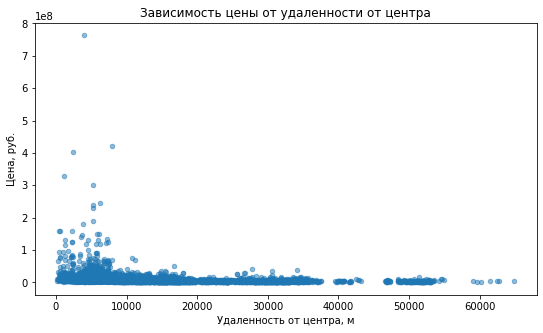

In [153]:
print('Коэффициент корреляции между ценой и удаленности от центра {:.3f}'.format(good_data['last_price'].corr(good_data['cityCenters_nearest'])))

ax = (good_data
      .loc[ : ,['last_price', 'cityCenters_nearest']]
      .plot(y='last_price',
            x='cityCenters_nearest',
            kind='scatter',
            alpha=0.5,
            figsize=(9,5),
            title='Зависимость цены от удаленности от центра')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Удаленность от центра, м')
ax.set_ylabel('Цена, руб.')
plt.show()

Видим удорожание объектов в близости к центру, но зависимость цены от удаленности к центру не очевидна, на это могут влиять дорогостоящие объекты в удаленных от центра районах, а также размеры объектов.

Коэффициент корреляции между ценой и удаленности от центра 1-комнатных квартир -0.372


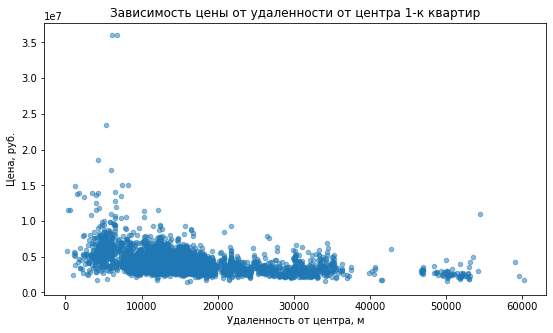

In [154]:
print('Коэффициент корреляции между ценой и удаленности от центра 1-комнатных квартир {:.3f}'.format(good_data.query('rooms == 1')['last_price'].corr(good_data['cityCenters_nearest'])))

ax = (good_data
      .query('rooms == 1')
      .loc[ : ,['last_price', 'cityCenters_nearest']]
      .plot(y='last_price',
            x='cityCenters_nearest',
            kind='scatter',
            alpha=0.5,
            figsize=(9,5),
            title='Зависимость цены от удаленности от центра 1-к квартир')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Удаленность от центра, м')
ax.set_ylabel('Цена, руб.')
plt.show()

Видим что коэффициент корреляции увеличивается при сокращении диапазона поиска.

**Цена от даты публикации (дня недели, месяца и года)**

Коэффициент корреляции между ценой и днем недели: 0.003


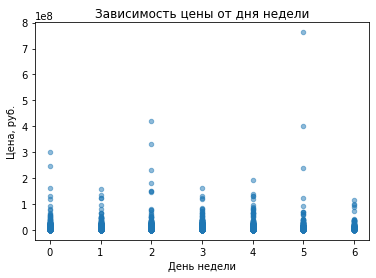

In [155]:
print('Коэффициент корреляции между ценой и днем недели: {:.3f}'.format(good_data['last_price'].corr(good_data['weekday_exposition'])))

ax = (good_data
      .loc[ : ,['last_price', 'weekday_exposition']]
      .plot(y='last_price',
            x='weekday_exposition',
            kind='scatter',
            alpha=0.5,
            title='Зависимость цены от дня недели')
     )

#  Добавляем подписи к осям:
ax.set_xlabel('День недели')
ax.set_ylabel('Цена, руб.')
plt.show()

Коэффициент корреляции между ценой и днем недели: -0.001


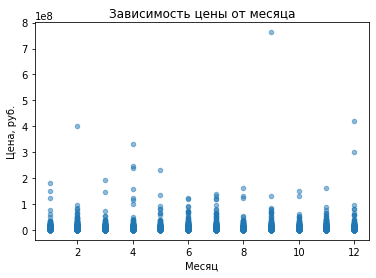

In [156]:
print('Коэффициент корреляции между ценой и днем недели: {:.3f}'.format(good_data['last_price'].corr(good_data['month_exposition'])))

ax = (good_data
      .loc[ : ,['last_price', 'month_exposition']]
      .plot(y='last_price', 
            x='month_exposition', 
            kind='scatter',
            alpha=0.5,
            title='Зависимость цены от месяца')
     )

#  Добавляем подписи к осям:
ax.set_xlabel('Месяц')
ax.set_ylabel('Цена, руб.')
plt.show()

Коэффициент корреляции между ценой и днем недели: -0.049


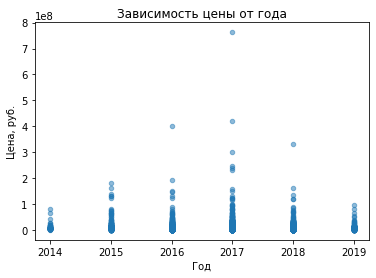

In [157]:
print('Коэффициент корреляции между ценой и днем недели: {:.3f}'.format(good_data['last_price'].corr(good_data['year_exposition'])))

ax = (good_data
      .loc[ : ,['last_price', 'year_exposition']]
      .plot(y='last_price',
            x='year_exposition',
            kind='scatter',
            alpha=0.5, 
            title='Зависимость цены от года')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Год')
ax.set_ylabel('Цена, руб.')
plt.show()

Зависимости цены от даты публикации не выявлено

 Посчитаем среднюю цену квадратного метра в топ 10 населенных пунктах по количеству публикаций и выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [158]:
top_good_data = (good_data
 .pivot_table(index='locality_name', 
              values='price_per_meter', 
              aggfunc=['mean', 'count'])
 )
top_good_data.columns=['mean_price_per_meter', 'count']
top_good_data.sort_values(by='count', ascending=False).head(10)

,mean_price_per_meter,count
locality_name,,
Санкт-Петербург,112251.889,11776
Мурино,85663.714,479
Кудрово,93992.763,370
Шушары,78193.962,348
Всеволожск,68805.816,294
Пушкин,102239.810,266
Колпино,74923.348,259
Парголово,89164.034,244
Гатчина,67226.597,230


Населенный пункт с самой высокой стоимостью жилья - Санкт-Петербург, населенный пункт с самой низкой стоимостью жилья - Выборг.

#### Зависимость цены от удаленности от центра

Выделим срез данных по г. Санкт-Петербург и пересчитаем расстояние до центра в километрах

In [159]:
#получим столбец с расстоянием до центра в километрах
df_calc['cityCenters_km'] = round(df_calc['cityCenters_nearest'] / 1000)
#рассчитаем среднюю цену за каждый удаленный от центра км
price_km = (df_calc
            .query('locality_name=="Санкт-Петербург"')
            .pivot_table(index='cityCenters_km', values='last_price')
            .reset_index()
           )
price_km

,cityCenters_km,last_price
0,0.000,32351004.923
1,1.000,21676179.000
2,2.000,17800559.306
3,3.000,11171804.758
4,4.000,13507561.933
5,5.000,14645540.834
6,6.000,15454188.779
7,7.000,15034682.862
8,8.000,10122741.621
9,9.000,6966704.422


Построим график зависимости цены от удалённости от центра.

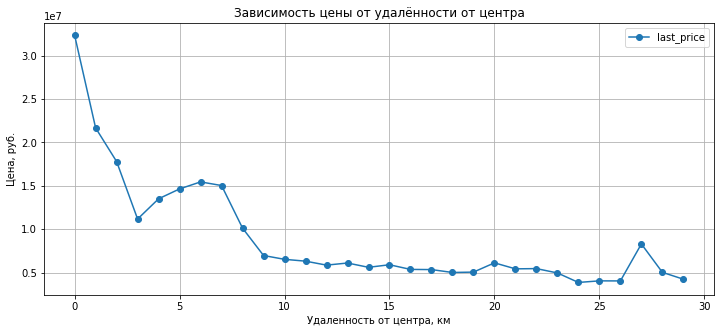

In [160]:
ax = (price_km
      .plot(x='cityCenters_km',
            y='last_price',
            style='o-',
            figsize=(12,5),
            grid=True,
            title='Зависимость цены от удалённости от центра')
     )
#  Добавляем подписи к осям:
ax.set_xlabel('Удаленность от центра, км')
ax.set_ylabel('Цена, руб.')
plt.show()

Видим границу в области 7 км график сильно меняется — центральная зона.

**Вывод**

Установлена зависимоть цены от удаленности от центра, в максимальной близости к центру самые дорогие квартиры, по мере удаленности средняя цена за квартиру снижается.

### Исследование параметров квартир в центре

выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

Выделим сегмент квартир в центре и проанализируем эту территорию 

In [161]:
print('Всего объектов в центре Санкт-Петербурга: {:.0f}'.format(df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]))
print('аппартаментов: {:.0f}'.format(df.query('is_apartment == True and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]))
print('квартир: {:.0f}'.format(df.query('is_apartment == False and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]))
print('студий: {:.0f}'.format(df.query('studio == True and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]))
print('квартир с комнатами: {:.0f}'.format(df.query('studio == False and is_apartment == False and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]))
one_room = df.query('studio == False and is_apartment == False and rooms == 1 and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]
print('1-к квартир: {:.0f}'.format(one_room))
two_rooms = df.query('studio == False and is_apartment == False and rooms == 2 and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]
print('2-к квартир: {:.0f}'.format(two_rooms))
three_rooms = df.query('studio == False and is_apartment == False and rooms == 3 and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]
print('3-к квартир: {:.0f}'.format(three_rooms))
more_rooms = df.query('studio == False and is_apartment == False and rooms > 3 and cityCenters_km < 7 and locality_name=="Санкт-Петербург"').shape[0]
print('3-к и более квартир: {:.0f}'.format(more_rooms))



Всего объектов в центре Санкт-Петербурга: 2893
аппартаментов: 12
квартир: 2881
студий: 8
квартир с комнатами: 2873
1-к квартир: 408
2-к квартир: 807
3-к квартир: 892
3-к и более квартир: 764


In [162]:
df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"')['total_area'].describe()

count   2893.000
mean      95.266
std       60.901
min       12.000
25%       59.000
50%       80.900
75%      112.000
max      631.200
Name: total_area, dtype: float64

In [163]:
df_calc.query('locality_name=="Санкт-Петербург"')['total_area'].describe()

count   14497.000
mean       65.157
std        40.988
min        12.000
25%        42.000
50%        55.000
75%        75.000
max       900.000
Name: total_area, dtype: float64

Изучим следующие параметры: площадь, цена, число комнат, высота потолков относительно общего набора данных

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

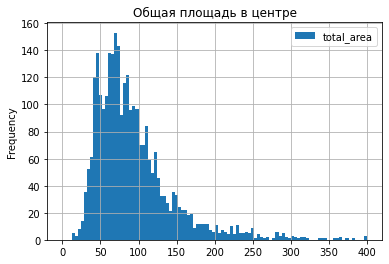

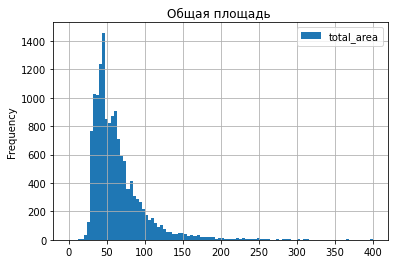

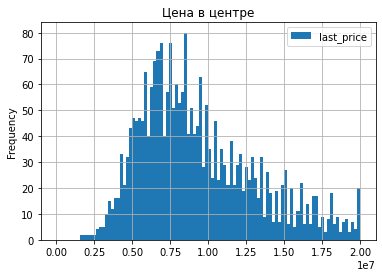

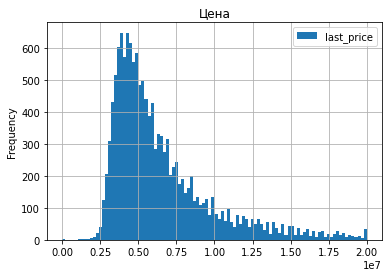

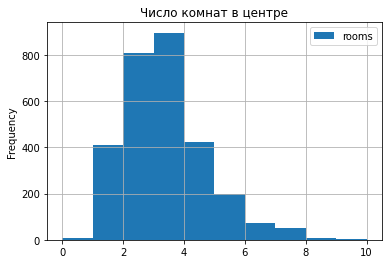

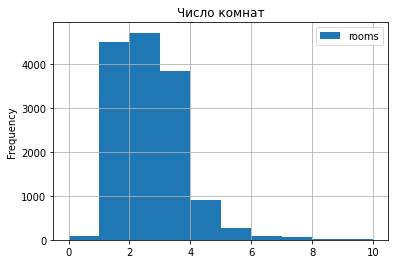

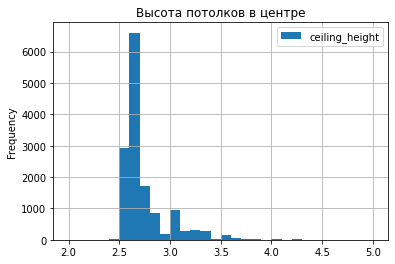

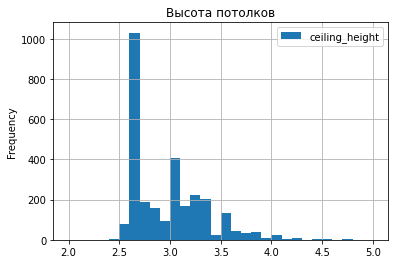

In [164]:
df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"').plot(bins=100, kind='hist', y='total_area', title='Общая площадь в центре', grid=True, range=(0,400))
df_calc.query('locality_name=="Санкт-Петербург"').plot(bins=100, kind='hist', y='total_area', title='Общая площадь ', grid=True, range=(0,400))
df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"').plot(bins=100, kind='hist', y='last_price', title='Цена в центре', grid=True, range=(0,20000000))
df_calc.query('locality_name=="Санкт-Петербург"').plot(bins=100, kind='hist', y='last_price', title='Цена', grid=True, range=(0,20000000))
df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"').plot(bins=10, kind='hist', y='rooms', title='Число комнат в центре', grid=True, range=(0,10))
df_calc.query('locality_name=="Санкт-Петербург"').plot(bins=10, kind='hist', y='rooms', title='Число комнат', grid=True, range=(0,10))
df_calc.query('locality_name=="Санкт-Петербург"').plot(bins=30, kind='hist', y='ceiling_height', title='Высота потолков в центре', grid=True, range=(2,5))
df_calc.query('cityCenters_km < 7 and locality_name=="Санкт-Петербург"').plot(bins=30, kind='hist', y='ceiling_height', title='Высота потолков', grid=True, range=(2,5))


**Вывод**

Сравнивая полученные гистограммы видим, медиана общей площади квартир в центре смещена вправо, в центре преобладают квартиры большей площади. Медиана цены также смещена вправо, в центре квартиры дороже. В центре преимущественно 2-х и 3-х комнатные квартиры, тогда как в общем наборе данных 1-к и 2-к квартиры. Высота потолков отличается не существенно как в общем наборе данных так и в центре преимущественно квартиры с высотой 2,7 м.

#### Факторы влияющие на стоимость квартир в центре

Выделим следующие факторы: общая площадь, число комнат, этаж, удалённость от центра, дата размещения объявления

In [165]:
Center_corr = (df_calc
              .query('cityCenters_km < 7 and locality_name == "Санкт-Петербург"')
              .loc[ : ,['last_price', 
                        'rooms', 
                        'cityCenters_nearest',
                        'weekday_exposition',
                        'month_exposition',
                        'year_exposition']
                  ])

Total_corr = (df_calc
              .query('locality_name == "Санкт-Петербург"')
              .loc[ : ,['last_price', 
                        'rooms', 
                        'cityCenters_nearest',
                        'weekday_exposition',
                        'month_exposition',
                        'year_exposition']
                  ])
            
print('Матрица корреляции для квартир в центре: ')
print()
display(Center_corr.corr())
print()
print('Матрица корреляции для квартир во всем городе: ')
print()
display(Total_corr.corr())

Матрица корреляции для квартир в центре: 



,last_price,rooms,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000,0.305,-0.051,0.026,-0.015,-0.028
rooms,0.305,1.000,-0.134,-0.011,-0.038,-0.054
cityCenters_nearest,-0.051,-0.134,1.000,-0.015,-0.001,0.035
weekday_exposition,0.026,-0.011,-0.015,1.000,0.024,-0.005
month_exposition,-0.015,-0.038,-0.001,0.024,1.000,-0.241
year_exposition,-0.028,-0.054,0.035,-0.005,-0.241,1.000



Матрица корреляции для квартир во всем городе: 



,last_price,rooms,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000,0.372,-0.258,0.004,-0.003,-0.043
rooms,0.372,1.000,-0.296,-0.008,-0.013,-0.062
cityCenters_nearest,-0.258,-0.296,1.000,0.001,0.014,0.086
weekday_exposition,0.004,-0.008,0.001,1.000,0.003,-0.006
month_exposition,-0.003,-0.013,0.014,0.003,1.000,-0.276
year_exposition,-0.043,-0.062,0.086,-0.006,-0.276,1.000


            last_price  floor_cat
last_price       1.000      0.132
floor_cat        0.132      1.000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor_cat', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor_cat'>,
        <AxesSubplot:xlabel='floor_cat', ylabel='floor_cat'>]],
      dtype=object)

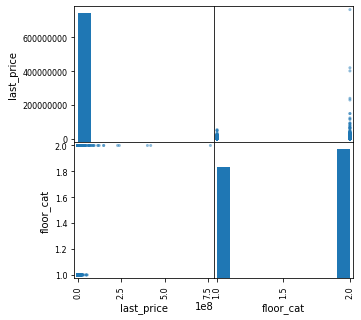

In [166]:
Floor_final_corr = df_calc.query('cityCenters_km < 7').loc[ : ,['last_price', 'floor_cat']]
Floor_final_corr.drop(Floor_final_corr[Floor_final_corr.floor_cat == 'Другой'].index, inplace=True)
Floor_final_corr.loc[Floor_final_corr['floor_cat']=='Первый','floor_cat']=1
Floor_final_corr.loc[Floor_final_corr['floor_cat']=='Последний','floor_cat']=2
floor_corr.drop(floor_corr[floor_corr.floor_cat == 'Другой'].index, inplace=True)
Floor_final_corr['floor_cat']=Floor_final_corr['floor_cat'].astype(int)
print(Floor_final_corr.corr())
pd.plotting.scatter_matrix(floor_corr, figsize=(5, 5))


Цены на квартир на последних этажах выше квартир на первых. Коэфициент кореляции немного выше чем по всему городу.

**Вывод**

В процессе предобработки данных были выявлены пропуски, заменены типы данных, выявлены и удалены дубликаты в названиях населенных пунктов. Стоит обратить внимание на выбор пользователем правильного типа населенного пункта, исключить дублирующие названия с различными написаниями букв и комбинацией слов.

Выявлены аномалии в количестве дней размещения объектов в связи с особенностью размещения объявлений на платформе, для полноты картины необходима информация о причине снятия объявления: планомерно платформой или пользователем в связи с отменой продажи или успешной продажей на платформе.

Установлена зависимость средней стоимости квартиры от общей площади, количества комнат, этажности и удаленности от центра.
Корреляция цены и даты размещения объявления низкая, однако можно наблюдать выбросы в понедельник, вторник и субботу, а также рост цен с марта по май.

Выявлены границы центральной части города - радиус 7 км. 

Выраженных отличий факторов в центре города и по всему городу не выявлено, в центре преобладают квартиры большей площади, стоимость квартир в центре выше.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод